In [1]:
# You can install scikit image with the following code
# !conda install scikit-image

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread, imshow
import skimage.filters as filters
import skimage.feature as feature
from skimage.measure import label
import os

from tqdm import tqdm

from skimage.feature import canny

In [2]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 5A99-20A3

 Directory of c:\Users\xande\DS6MLcases

13/12/2024  15:20    <DIR>          .
13/12/2024  15:20    <DIR>          ..
13/12/2024  11:35            24.596 case_study.ipynb
13/12/2024  11:35    <DIR>          Reduced MNIST
               1 File(s)         24.596 bytes
               3 Dir(s)  795.922.284.544 bytes free


In [10]:
train_path = r'C:\Users\xande\DS6MLcases\Reduced MNIST\Reduced MNIST Data\Reduced Trainging data\8'
train_files = os.listdir(train_path)

In [5]:
print(train_files[:10])

['4852.jpg', '4853.jpg', '4854.jpg', '4855.jpg', '4856.jpg', '4857.jpg', '4858.jpg', '4859.jpg', '4860.jpg', '4861.jpg']


In [17]:
yappa = train_path + "\\" + train_files[5]

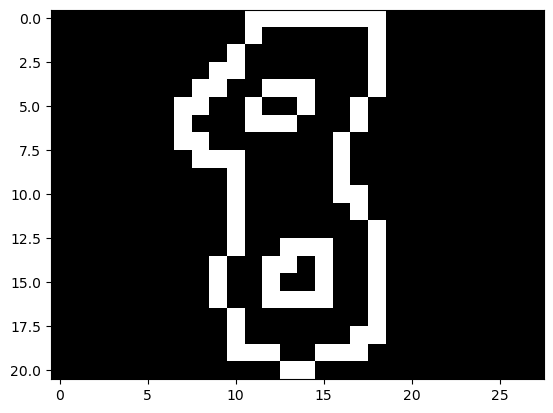

In [18]:
img = imread(yappa)
img = feature.canny(img)
filter1 = (img == True).any(axis = 1)
plt.imshow(img[filter1], cmap = 'gray')

In [19]:
img.reshape(784).sum()

80

In [25]:
edging = canny(img)



In [26]:
labeled_edging = label(edging)
num_edging = labeled_edging.max()

In [ ]:
def calculate_features(file: str) -> (dict, np.array):
    """
    Calculating features of an image

    This function calculates the following features:
    - Number of edges
    - Height
    - Width
    - Max number of pixels per column
    - Min number of pixel per row
    - Total pixels
    """
    # Load your image
    train_path = r'C:\Users\xande\DS6MLcases\Reduced MNIST\Reduced MNIST Data\Reduced Trainging data\8'
    train_files = os.listdir(train_path)
    print(train_files[:10])

    yappa = train_path + "\\" + train_files[5]
    
    img = imread(yappa)
    img = feature.canny(img)
    filter1 = (img == True).any(axis = 1)
    plt.imshow(img[filter1], cmap = 'gray')

   
    edging = canny(img)
    labeled_edging = label(edging)
    
    # Do your calculations here 
    height, width = img.shape
    num_edging = labeled_edging.max()
    max_column = np.max(edging.sum(axis=0))
    max_row = np.max(edging.sum(axis=1))

    total = np.sum(edging)

    img_features = {
        'Number of edges': num_edging,
        'Height of digit': height,
        'Width of digit': width,
        'Max pixels per column': max_column,
        'Max pixels per row': max_row,
        'Total pixels': total
    }
    return img_features, img

In [13]:
for i in range(10):
    # Load i^th digit folder
    train_path = f'Reduced Trainging data/{i}/'
    train_files = os.listdir(train_path)

    # For all images, extract the features
    for f in tqdm(train_files, desc = f'Extracting training features {i}'):
        img_features, img = calculate_features(train_path + f)
        continue

    # repeat, but for the test data
    test_path = f'Reduced Testing data/{i}/'
    test_files = os.listdir(test_path)
    for f in tqdm(test_files, desc = f'Extracting testing features {i}'):
        continue

Extracting testing features 9: 100%|█████████████████████████████████████████████████████████| 200/200 [00:00<?, ?it/s]
